# Veri Kümesi

Bu veri seti, Nisan 2005-Eylül 2005 tarihleri arasında Tayvan'da varsayılan ödemeler, nüfus faktörleri, kredi verisi, ödeme tarihi, kredi kartı müşteri fatura tabloları hakkında bilgileri içermektedir.

İÇERİK
•	ID: Her müşterinin ID'si
•	LIMIT_BAL: NT dolar cinsinden verilen kredi miktarı (bireysel ve aile/ek kredi dahil)
•	SEX: Cinsiyet (1=erkek, 2=kadın)
•	EDUCATION: (1=yüksek okul, 2=üniversite, 3=lise, 4=diğerleri, 5=bilinmiyor, 6=bilinmiyor)
•	MARRIAGE: Marital status (1=evli, 2=bekar, 3=diğerleri)
•	AGE: Yaş
•	PAY_0: 2005 yılı Eylül ayında geri ödeme durumu (-1 = usulüne uygun ödeme, 1 = bir ay ödeme gecikmesi, 2 = iki ay ödeme gecikmesi, ... 8 = sekiz ay ödeme gecikmesi, 9 = dokuz ay ve üstü ödeme gecikmesi)
•	PAY_2: Ağustos 2005’te geri ödeme durumu (yukarıdaki ile aynı ölçek)
•	PAY_3: Temmuz 2005’te geri ödeme durumu (yukarıdaki ile aynı ölçek)
•	PAY_4: Haziran 2005’te geri ödeme durumu (yukarıdaki ile aynı ölçek)
•	PAY_5: Mayıs 2005’te geri ödeme durumu (yukarıdaki ile aynı ölçek)
•	PAY_6: Nisan 2005’te geri ödeme durumu (yukarıdaki ile aynı ölçek)
•	BILL_AMT1: 2005 yılı Eylül ayında fatura beyanı tutarı (NT doları)
•	BILL_AMT2: Ağustos 2005’te fatura beyanı tutarı (NT doları)
•	BILL_AMT3: Temmuz 2005’te fatura beyanı tutarı (NT doları)
•	BILL_AMT4: Haziran 2005’te fatura beyanı tutarı (NT doları)
•	BILL_AMT5: Mayıs 2005’te fatura beyanı tutarı (NT doları)
•	BILL_AMT6: Nisan 2005’te fatura beyanı tutarı (NT doları))
•	PAY_AMT1: Eylül 2005’te önceki ödemenin tutarı (NT doları)
•	PAY_AMT2: Ağustos 2005’te önceki ödemenin tutarı (NT doları)
•	PAY_AMT3: Haziran 2005’te önceki ödemenin tutarı (NT doları)
•	PAY_AMT4: Mayıs 2005’te önceki ödemenin tutarı (NT doları)
•	PAY_AMT5: Mayıs 2005’te önceki ödemenin tutarı (NT doları))
•	PAY_AMT6: Nisan 2005’te önceki ödemenin tutarı (NT doları)
•	default.payment.next.month: Varsayılan ödeme (1 = evet, 0 = hayır)


# Paketleri Yüklemek

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

# Veriyi okutma ve veri hakkından bilgi edinmek.

In [2]:
df = pd.read_excel('defaultofcreitcardclients.xls')
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Veriyi yorumlama

30.000 ayrı kredi kartı müşterisi var.

Kredi kartı limiti tutarı için ortalama değer 167,484'tür. Standart sapma alışılmadık derecede büyük, maksimum değer 1M.

Eğitim seviyesi çoğunlukla lisansüstü okul ve üniversitedir.

Müşterilerin çoğu ya evlenir ya da bekardır (diğer statüden daha az sıklıkta).

Ortalama yaş, standart sapma 9.2 olan 35.5'tir

Varsayılan ödeme için 0 değeri 'varsayılan değil' ve 1 değeri 'varsayılan' anlamına geldiğinden, 0.221'in ortalaması, gelecek ay varsayılan olacak kredi kartı sözleşmelerinin% 22.1'i olduğu anlamına gelir (bunu bu analizin sonraki bölümlerinde doğrular) ).

# Eksik verileri kontrol etmek.

In [3]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default payment next month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Veri Keşfi (Data Exploration)

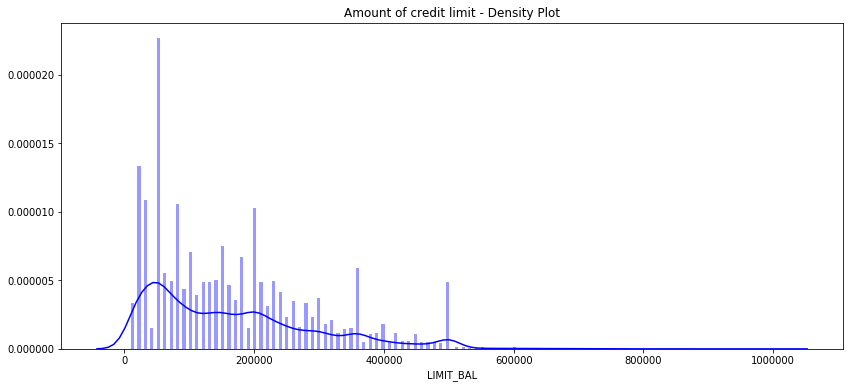

In [4]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

En büyük kredi limiti tutarı grubu, görünüşe göre 50 bin tutarında. Bunu doğrulayalım.

In [5]:
df['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

En fazla kredi kartı sayısı 50.000 (3365), ardından 20.000 (1976) ve 30.000 (1610) ile sınırlıdır.

# Korelasyon Matrisi

İki veya daha fazla bağımsız değişken (öznitelik)arasındaki ilişkinin varlığı, bu ilişkinin yönü ve şiddeti; korelasyon analizi ve sonucunda elde edilen korelasyon katsayısı ile belirlenir.

Korelasyon katsayısı “r”, “-1” ve “1” arasında değişen değerler alır. Değer sonuçları ile ilgili yorumlar aşağıdaki gibidir:
r = -1 → negatif yönlü mükemmel bir ilişki
r = 1 → pozitif yönlü mükemmel bir ilişki
r = 0 → ilişki yok
r = 0.8 → pozitif yönlü iyi bir ilişki
r = -0.6 → negatif yönlü orta seviye bir ilişki

Veri kümesinde yer alan tüm öznitelikler arasındaki korelasyon katsayısı değerlerini içeren matrisi hesaplamak için aşağıdaki kod parçası kullanılır.


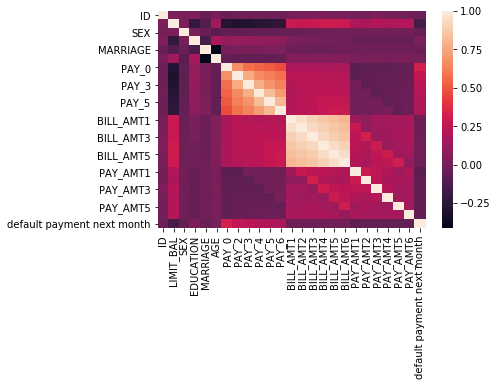

In [6]:
corr=df.corr()
sns.heatmap(corr)

# Korelasyon matrisine göre birbiriyle fazla korele olmuş değişkenler elenir.

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

# Eğitim-Test Veri parçalaması

Modelimiz için kullanacağımız veri setini eğitim ve test veri seti olarak iki parçaya ayırıyoruz.  Eğitim verisi ile modeli eğitirken, test verimizi kullanarakta eğitim verisi ile öğrenmiş  modelimizin başarısını değerlendiriyoruz. Bölünme işlemi genellikle 66/34 şeklinde yapılmaktadır %66 eğitim verisi iken %34’lük kısım test olarak ayrılmaktadır. Bu işlem için  sklearn.crossvalidation kütüphanesinin  train_test_split() metodunu içeri aktarıyoruz.

In [8]:
list=['ID','default payment next month']
y=df['default payment next month']
X=df.drop(list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21177,300000,1,3,2,31,0,0,0,0,0,0,80928,4000,4000,4100,3300,3500,3500
23942,20000,1,2,2,24,0,0,0,0,0,0,15730,1313,2110,4000,6000,4000,174
1247,90000,2,2,2,35,-1,-1,-1,-2,-2,-2,2667,2667,0,0,0,0,0
23622,300000,2,2,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0
28454,70000,2,2,2,36,0,0,0,0,0,0,68028,3340,2044,1773,1181,1215,1297


# Ölçeklendirme 

Makine öğrenmesi algoritmalarının çoğu hesaplamalarında uzaklık metriklerinden olan  iki veri noktası arasındaki mesafeyi ölçen  Öklid formülünü kullanır. Tüm değerlerin eşit olarak katkıda bulunmasını sağlamak için değerler aynı birime getirilmesi gerekmektedir. Büyüklük bakımından oldukça değişkenlik gösteren veriler mesafe hesaplamalarında, ağırlık hesaplamalarında düşük değerdeki özelliklerden daha ağır basacağından varyansı artıracaktır ve eşit etki etmeyeceklerdir. Özellik standardizasyonu yöntemi  ile veriler ölçeklendirilir. Bu işlem için python da Sklearn.preprocessing kütüphanesinin  StandardScaler metodu  içe aktarılıp kullanılmkatadır.

In [13]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNeighborsClassifier

K-en yakın komşuluk (KNN) algoritması, uygulaması kolay gözetimli öğrenme algoritmalarındandır. Neredeyse hiç bir eğitim modeli gerekmez. Temelde eğitim verisini tarar ve hafızada tutar.Hem sınıflandırma hem de regresyon analizi icin kullanilabilir. 
Örnek veri setine katılacak olan yeni verinin, mevcut verilere göre uzaklığı hesaplanıp, k sayıda yakın komşuluğuna bakılır. Uzaklık hesapları için genelde 3 tip uzaklık fonksiyonu kullanılmaktadır:
"Euclidean" Uzaklık
"Manhattan" Uzaklık
"Minkowski" Uzaklığı’dır.

Parametreleri:
n_neighbors:Kullanılacak komşu sayısı.
weights:Tahminde kullanılan ağırlık fonksiyonu.
metric:Ağaç için kullanılacak mesafe ölçüsü.


KNN NASIL DAHA GÜÇLÜ BİR ALGORİTMA HALİNE GETİRİLEBİLİR?
• İyi bir K değeri belirlemek:
 -K değeri küçük seçilirse modelimiz gürültüye karşı çok hassaslaşır yani
gürültü de modelimiz tarafından kullanılır.
 -K-değeri çok büyük seçilirse çok farklı komşuluklardan çok fazla komşu gelir
ve model iyi tahmin yapamaz.
• K-nn içinde uzaklıklar çok dağınık ise bu problem oluşturu ve bu durumda
uzaklığa bağlı bir ağırlık sistemi kullanılmalıdır. 

In [14]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Knn Train Score:', knn.score(X_train,y_train))
print('Knn Test Score:', knn.score(X_test,y_test))

Knn Train Score: 0.8421777777777778
Knn Test Score: 0.796


In [15]:
grid_params={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']}

gs = GridSearchCV(knn,
                 grid_params,
                 cv=3,
                 )
gs_results = gs.fit(X_train, y_train)
print('En iyi score',gs_results.best_score_)
print('En iyi parametreler',gs_results.best_params_)
print('Knn Train Yeni Score:', gs.score(X_train,y_train))
print('Knn Test Yeni Score:', gs.score(X_test,y_test))


En iyi score 0.8139111111111111
En iyi parametreler {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Knn Train Yeni Score: 0.8229777777777778
Knn Test Yeni Score: 0.8112


In [16]:
y_pred=gs.predict(X_test)
print(classification_report(y_test,y_pred))
cm1=confusion_matrix(y_test,y_pred)
print('KNeighborsClassifier confusion matrix:\n', cm1)


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.62      0.33      0.43      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.64      0.66      7500
weighted avg       0.79      0.81      0.79      7500

KNeighborsClassifier confusion matrix:
 [[5546  327]
 [1089  538]]


# RandomForestClassifier

RandomForest denetimli bir öğrenme algoritmasıdır.Hiperparametre ayarı yapmadan bile, çoğu zaman büyük bir sonuç üreten, esnek, kullanımı kolay bir makine öğrenmesi algoritmasıdır. 
RandomForest, birden fazla karar ağacını oluşturur ve daha doğru ve istikrarlı bir tahmin elde etmek için onları birleştirir.

Parametreleri:
-n_estimators:Ormandaki ağaç sayısı
-max_depth:Ağacın maksimum derinliği
-random_state:Ağaç oluştururken kullanılan örneklerin önyüklemesinin rastgele olup olmadığını ve her düğümde en iyi bölünme aranırken göz önünde bulundurulacak özelliklerin örneklemesini kontrol eder.

AVANTAJLARI VE DEZAVANTAJLARI
Kullanışlı ve kullanımı kolay bir algoritma olarak kabul edilir, çünkü varsayılan hiperparametreler genellikle iyi bir tahmin sonucu oluşturur. Hiperparametre sayısı da o kadar yüksek değildir ve anlaşılması kolaydır.
Dezavantajı, ormanda yeterince ağaç olması durumunda, sınıflandırıcının modele uymayacağıdır.



In [17]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
print('RandomForestClassifier Train Score:', rfc.score(X_train,y_train))
print('RandomForestClassifier Test Score:', rfc.score(X_test, y_test))

C:\Users\cemre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier Train Score: 0.9793777777777778
RandomForestClassifier Test Score: 0.8034666666666667


In [18]:
parameters = {
    'n_estimators'      : [50,100,200],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
}

gs1 = GridSearchCV(rfc,
                 parameters,
                 cv=3,
                 )
gs1_results = gs1.fit(X_train, y_train)
print('En iyi score',gs1_results.best_score_)
print('En iyi parametreler',gs1_results.best_params_)
print('RandomForestClassifier Train Yeni Score:', gs1.score(X_train,y_train))
print('RandomForestClassifier Test Yeni Score:', gs1.score(X_test,y_test))

En iyi score 0.8208
En iyi parametreler {'max_depth': 8, 'n_estimators': 200, 'random_state': 0}
RandomForestClassifier Train Yeni Score: 0.8381333333333333
RandomForestClassifier Test Yeni Score: 0.8208


In [19]:
y_pred1=gs1.predict(X_test)
print(classification_report(y_test,y_pred1))
cm2=confusion_matrix(y_test,y_pred1)
print('RandomForestClassifier confusion matrix:\n', cm2)


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.36      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

RandomForestClassifier confusion matrix:
 [[5575  298]
 [1046  581]]


# SVC
Support Vector Machine sınıflandırma için kullanılan yöntemlerden birisidir. Temel olarak iki sınıfı bir doğru veya düzlem ile birbirinden ayırmaya çalışır. Bu ayırmayı da sınırdaki elemanlara göre yapar.

AVANTAJLARI:
• Oldukça değişik veri kümesinde kullanılabilirler.
• Değişik çekirdekler ile veriye uyumlu hale getirilebilirler.
• Hem yüksek hem düşük boyutlu veriler için kullanılabilirler.

DEZAVANTAJLARI:
•Verimli değil.
•Dikkatli şekilde verinin ve parametlerin normalize edilmesi gerek.
•Tahminin neden yapıldığını anlamak ve anlatmak zordur.


In [20]:
svc=SVC(kernel='linear', C=1)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print('SVC Train Score:', svc.score(X_train,y_train))
print('SVC Test Score:', svc.score(X_test, y_test))

print(classification_report(y_test,svc_pred))
cm3=confusion_matrix(y_test,svc_pred)
print('SVC confusion matrix:\n', cm3)


SVC Train Score: 0.8096888888888889
SVC Test Score: 0.8088
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.68      0.22      0.34      1627

    accuracy                           0.81      7500
   macro avg       0.75      0.60      0.61      7500
weighted avg       0.79      0.81      0.77      7500

SVC confusion matrix:
 [[5700  173]
 [1261  366]]


# GaussianNB

Naive Bayes; Bayes teoremin dayanan bir sınıflandırma tekniğidir. Sınıflandırma yaparken özellikleri birbirinden bağımsız olarak hesaba katar.

Naïve Bayes sınıflandırmasında sisteme belirli bir oranda öğretilmiş veri sunulur. Öğretim için sunulan verilerin mutlaka bir sınıfı bulunmalıdır. Öğretilmiş veriler üzerinde yapılan olasılık işlemleri ile, sisteme sunulan yeni test verileri, daha önce elde edilmiş olasılık değerlerine göre işletvilir ve verilen test verisinin hangi kategoride olduğu tespit edilmeye çalışılır. Elbette öğretilmiş veri sayısı ne kadar çok ise, test verisinin gerçek kategorisini tespit etmek o kadar kesin olabilmektedir.

AVANTAJLARI
•Algoritmayı kodlamasınıj ve sonucunda ne çıkacağını tahmin etmesinin kolay olması
•Elde edilen sonuçlar birbirinden bağımsız değişkenler kullanıldığında karmaşık algoritmalar ile eşdeğer nitelikte başarı sağlaması

DEZAVANTAJLARI
•Gerçek verilerdeki değişkenler birbirinden bağımsız verileri bulmanın çok zor olması problemi ve
•Değişkenler arasında ilişkiyi bu algoritma ile gösteremiyor olmamız yatmaktadır.


In [21]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('GaussianNB Train Score:', gnb.score(X_train,y_train))
print('GaussianNB Test Score:', gnb.score(X_test, y_test))
y_pred2=gnb.predict(X_test)

print(classification_report(y_test,y_pred2))
cm4=confusion_matrix(y_test,y_pred2)
print('GaussianNB confusion matrix:\n', cm4)

GaussianNB Train Score: 0.7239555555555556
GaussianNB Test Score: 0.7149333333333333
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      5873
           1       0.40      0.64      0.49      1627

    accuracy                           0.71      7500
   macro avg       0.64      0.69      0.65      7500
weighted avg       0.78      0.71      0.73      7500

GaussianNB confusion matrix:
 [[4322 1551]
 [ 587 1040]]


# LogisticRegression

Logistic Regression ( Lojistik Regresyon ) sınıflandırma işlemi yapmaya yarayan bir regresyon yöntemidir. Kategorik veya sayısal verilerin sınıflandırılmasında kullanılır. Bağımlı değişkenin yani sonucun sadece 2 farklı değer alabilmesi durumda çalışır. ( Evet / Hayır, Erkek / Kadın, Şişman / Zayıf vs. )



In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print('LogisticRegression Train Score:', log_reg.score(X_train, y_train))
print('LogisticRegression Test Score:', log_reg.score(X_test, y_test))
y_pred3=log_reg.predict(X_test)
print(classification_report(y_test,y_pred3))
cm5=confusion_matrix(y_test,y_pred3)
print('LogisticRegression confusion matrix:\n', cm5)

C:\Users\cemre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression Train Score: 0.8112
LogisticRegression Test Score: 0.8093333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.68      0.23      0.35      1627

    accuracy                           0.81      7500
   macro avg       0.75      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500

LogisticRegression confusion matrix:
 [[5691  182]
 [1248  379]]


# XGBClassifier
XGBoost , Extreme Gradient Boost'un kısaltmasıdır; En iyi ağaç modelini bulmak için daha doğru yaklaşımlar kullanan Gradient Boostting metodunun özel bir uygulamasıdır.

Özellikle yapılandırılmış verilerle, onu son derece başarılı kılan birkaç şık numara kullanır. En önemlileri:

1.) ikinci dereceden gradyanları hesaplamak , yani gradyanların yönü ve kayıp fonksiyonumuzun asgari seviyesine nasıl ulaşılacağı hakkında daha fazla bilgi sağlayan , kayıp fonksiyonunun ikinci kısmi türevleri ( Newton'un metoduna benzer ). Düzenli gradyan yükseltme, temel modelimizin (örneğin karar ağacı) kayıp fonksiyonunu, genel modelin hatasını en aza indirmek için bir vekil olarak kullanırken, XGBoost, ikinci derece türevini yaklaşık olarak kullanır.

2.) Ve model genellemesini geliştiren gelişmiş düzenlileştirme.

XGBoost'un ek avantajları vardır: eğitim çok hızlıdır ve kümeler arasında paralelleştirilebilir / dağıtılabilir.







In [23]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('Knn Train Score:', xgb.score(X_train,y_train))
print('Knn Test Score:', xgb.score(X_test,y_test))

Knn Train Score: 0.8256
Knn Test Score: 0.8194666666666667


In [24]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grids = GridSearchCV(xgb,
                 params,
                 cv=3,
                 )
grids_results = grids.fit(X_train, y_train)
print('En iyi score',grids_results.best_score_)
print('En iyi parametreler',grids_results.best_params_)
print('XGBClassifier Train Yeni Score:', grids.score(X_train,y_train))
print('XGBClassifier Test Yeni Score:', grids.score(X_test,y_test))

En iyi score 0.8216
En iyi parametreler {'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}
XGBClassifier Train Yeni Score: 0.8252444444444444
XGBClassifier Test Yeni Score: 0.8202666666666667


In [25]:
y_predd=grids.predict(X_test)
print(classification_report(y_test,y_predd))
cm6=confusion_matrix(y_test,y_predd)
print('XGBClassifier confusion matrix:\n', cm6)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.35      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

XGBClassifier confusion matrix:
 [[5579  294]
 [1054  573]]
